In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [4]:
X = data['data']
y = data['target']
feature_names = data['feature_names']
class_names = data['target_names']

In [5]:
X.shape

(569, 30)

In [6]:
y.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 43)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)                      # racunanje srednje vrednosti i standardne devijacije za svaku kolonu
X_train = scaler.transform(X_train)      # standardizacija na osnovu izracunatih vrednosti
X_test = scaler.transform(X_test)

In [11]:
# smanjuje dimenzionalnost podataka, ali pokusava da zadrzi sto veci udeo informacija
from sklearn.decomposition import PCA

In [12]:
# svodimo podatke na nove dve glavne komponente tj na dim = 2
pca = PCA(n_components = 2)
pca.fit(X_train) 

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [13]:
pca.components_

array([[ 0.21995317,  0.10721925,  0.22847987,  0.22141946,  0.13558133,
         0.23797564,  0.25443627,  0.2595558 ,  0.13698036,  0.0578554 ,
         0.21214371,  0.01060399,  0.21984409,  0.22216059, -0.00503796,
         0.16305778,  0.14178751,  0.17673481,  0.0299242 ,  0.09135192,
         0.22844765,  0.10938512,  0.23734408,  0.22486917,  0.12532273,
         0.2109505 ,  0.22563932,  0.25191745,  0.13046634,  0.13042567],
       [-0.22773215, -0.06837736, -0.20841053, -0.22253785,  0.18052802,
         0.14903184,  0.07506923, -0.03209724,  0.18983511,  0.36602132,
        -0.07234259,  0.10729821, -0.05041529, -0.13035866,  0.23002037,
         0.24871706,  0.2222696 ,  0.15629274,  0.19503846,  0.29456977,
        -0.22014308, -0.05945743, -0.19891267, -0.21671214,  0.14911751,
         0.12715043,  0.09867746, -0.01916165,  0.11367905,  0.26339402]])

In [14]:
from matplotlib import pyplot as plt

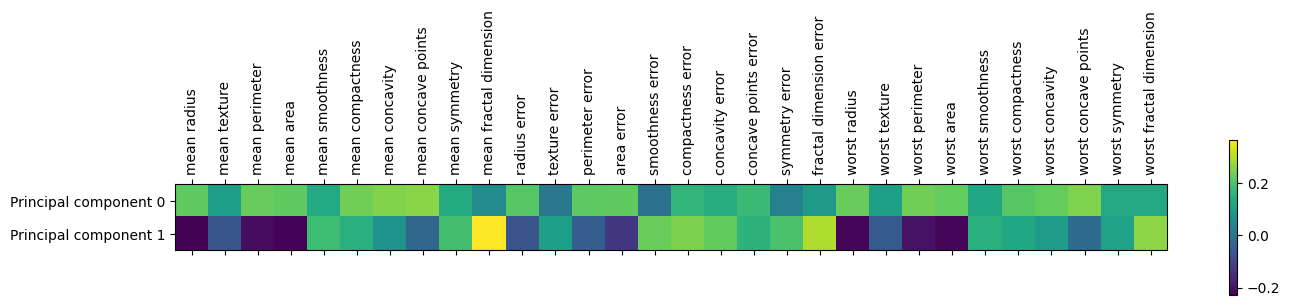

In [15]:
pca_names = [f'Principal component {i}' for i in range(pca.n_components_)]

plt.matshow(pca.components_)
plt.xticks(ticks = range(pca.components_.shape[1]), labels = feature_names, rotation = 'vertical')
plt.yticks(ticks = range(pca.n_components_), labels = pca_names)
plt.colorbar()
plt.show()

In [16]:
for i, component in enumerate(pca.components_):
    print(f'{pca_names[i]} = ', end = '')
    print(' + '.join(f'{coef:.2f}*{feature_name}' for coef, feature_name in zip(component, feature_names)))
    print('\n')

Principal component 0 = 0.22*mean radius + 0.11*mean texture + 0.23*mean perimeter + 0.22*mean area + 0.14*mean smoothness + 0.24*mean compactness + 0.25*mean concavity + 0.26*mean concave points + 0.14*mean symmetry + 0.06*mean fractal dimension + 0.21*radius error + 0.01*texture error + 0.22*perimeter error + 0.22*area error + -0.01*smoothness error + 0.16*compactness error + 0.14*concavity error + 0.18*concave points error + 0.03*symmetry error + 0.09*fractal dimension error + 0.23*worst radius + 0.11*worst texture + 0.24*worst perimeter + 0.22*worst area + 0.13*worst smoothness + 0.21*worst compactness + 0.23*worst concavity + 0.25*worst concave points + 0.13*worst symmetry + 0.13*worst fractal dimension


Principal component 1 = -0.23*mean radius + -0.07*mean texture + -0.21*mean perimeter + -0.22*mean area + 0.18*mean smoothness + 0.15*mean compactness + 0.08*mean concavity + -0.03*mean concave points + 0.19*mean symmetry + 0.37*mean fractal dimension + -0.07*radius error + 0.11*

In [17]:
pca.explained_variance_

array([13.46297325,  5.76832814])

In [18]:
pca.explained_variance_ratio_

array([0.44771233, 0.19182625])

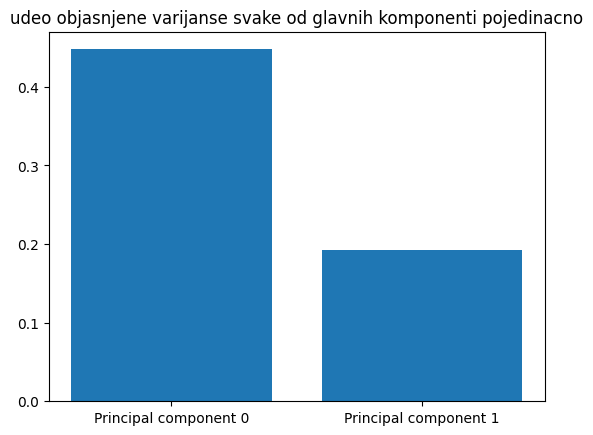

In [19]:
plt.bar(x = pca_names, height = pca.explained_variance_ratio_)
plt.title('udeo objasnjene varijanse svake od glavnih komponenti pojedinacno')
plt.show()

In [20]:
import numpy as np

In [21]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

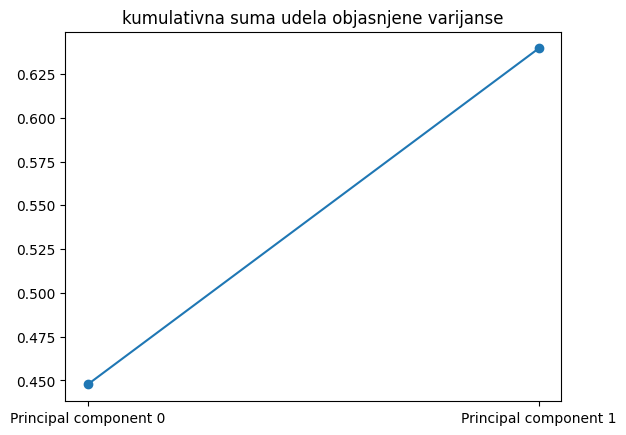

In [22]:
plt.plot(pca_names, cumulative_variance_ratio, marker = 'o')
plt.title('kumulativna suma udela objasnjene varijanse')
plt.show()

In [23]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

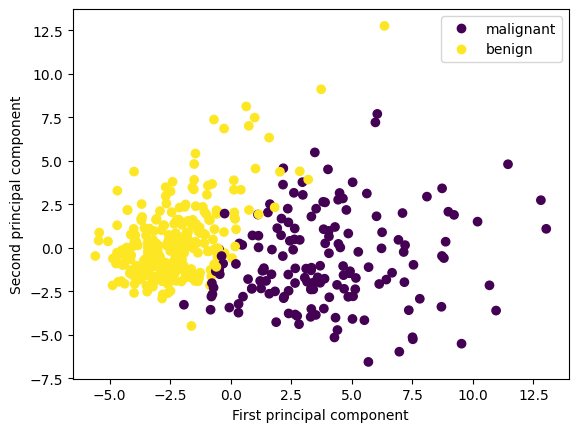

In [24]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(handles = scatter.legend_elements()[0], labels = class_names.tolist())
plt.show()

In [25]:
# mozemo odrediti vrednosti polaznih atributa na osnovu dobijenih

pca.inverse_transform(np.random.random(size = (1, 2)))

array([[-0.06632686, -0.01549678, -0.05778232, -0.06411842,  0.08583354,
         0.08438264,  0.05694256,  0.01517417,  0.08965881,  0.15074127,
        -0.00580485,  0.04350744,  0.00367996, -0.02763937,  0.09028944,
         0.11570794,  0.10298226,  0.08067906,  0.08022707,  0.12612059,
        -0.0624187 , -0.01174211, -0.05308075, -0.06144784,  0.07232954,
         0.07284253,  0.0631752 ,  0.0194626 ,  0.05888755,  0.11800233]])

In [26]:
# nedostatak PCA algoritma je taj sto nalazi samo linearne podprostore

In [27]:
r = 1
n = 25
phis = np.linspace(0, 180, num = n)
thetas = np.linspace(0, 360, num = n)

x = r * np.outer(np.sin(phis), np.cos(thetas))
y = r * np.outer(np.sin(phis), np.sin(thetas))
z = r * np.outer(np.cos(phis), np.ones(n))

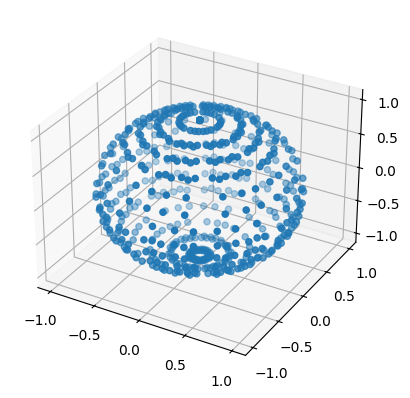

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(x, y, z)
plt.show()

In [29]:
data = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1), z.reshape(-1, 1)), axis = 1)
data.shape

(625, 3)

In [30]:
pca = PCA()
pca.fit(data)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [31]:
pca.explained_variance_ratio_

array([0.51059861, 0.25844352, 0.23095788])